In [1]:
import tensorflow as tf

from keras.layers import Conv2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import MaxPooling2D
from keras.models import Sequential

C:\Users\Arpit Shukla\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Arpit Shukla\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Arpit Shukla\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Arpit Shukla\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.

In [2]:
#Initializing the CNN (Convolutional Neural Network).
classifier = Sequential()
# Convolution - extracting appropriate features from the input image.
# Non-Linearity (RELU) - replacing all negative pixel values in feature map by zero.
classifier.add(Conv2D(32, 3, 3, input_shape=(64, 64, 3), activation='relu'))
# Pooling: reduces dimensionality of the feature maps but keeps the most important information.
classifier.add(MaxPooling2D(pool_size=(2, 2)))

#flattening
classifier.add(Flatten())

#Fully connected layers: ensures connections to all activations in the previous layer.
classifier.add(Dense(output_dim=128, activation='relu'))
classifier.add(Dense(output_dim=1, activation='sigmoid'))

#Compiling the CNN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


C:\Users\Arpit Shukla\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  """
C:\Users\Arpit Shukla\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  del sys.path[0]
C:\Users\Arpit Shukla\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`
  


In [6]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                                     rescale=1. / 255,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

training_set = train_datagen.flow_from_directory(
    'C:/Users/Arpit Shukla/Desktop/AadharPan dataset/training set',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

test_set = test_datagen.flow_from_directory(
    'C:/Users/Arpit Shukla/Desktop/AadharPan dataset/test set',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

classifier.fit_generator(
    training_set,
    steps_per_epoch=8,
    epochs=1,
    validation_data=test_set,
    validation_steps=2)

Found 8 images belonging to 2 classes.
Found 2 images belonging to 2 classes.
Epoch 1/1
8/8 [==============================] - 1s 129ms/step - loss: 0.5951 - acc: 0.6719 - val_loss: 0.5894 - val_acc: 0.5000


In [7]:
import numpy as np
from keras.preprocessing import image

In [8]:
test_image = image.load_img('C:/Users/Arpit Shukla/Desktop/AadharPan dataset/single prediction/aadhar_or_pan_2.jpeg', target_size=(64, 64))

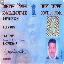

In [9]:
test_image

In [10]:
test_image = image.img_to_array(test_image)

In [11]:
test_image

array([[[180., 176., 173.],
        [184., 186., 185.],
        [151., 159., 162.],
        ...,
        [142., 205., 240.],
        [160., 188., 212.],
        [249., 254., 255.]],

       [[177., 177., 179.],
        [232., 235., 240.],
        [239., 246., 254.],
        ...,
        [131., 198., 251.],
        [127., 202., 241.],
        [223., 241., 241.]],

       [[152., 152., 160.],
        [162., 169., 179.],
        [148., 155., 165.],
        ...,
        [126., 197., 249.],
        [127., 192., 248.],
        [156., 184., 195.]],

       ...,

       [[237., 225., 225.],
        [225., 196., 201.],
        [222., 190., 203.],
        ...,
        [112., 183., 235.],
        [ 99., 174., 239.],
        [148., 187., 218.]],

       [[254., 248., 248.],
        [215., 183., 196.],
        [220., 188., 199.],
        ...,
        [131., 191., 255.],
        [120., 172., 230.],
        [229., 231., 230.]],

       [[249., 251., 248.],
        [203., 186., 194.],
        [234., 2

In [12]:
test_image = np.expand_dims(test_image, axis=0)

In [13]:
test_image

array([[[[180., 176., 173.],
         [184., 186., 185.],
         [151., 159., 162.],
         ...,
         [142., 205., 240.],
         [160., 188., 212.],
         [249., 254., 255.]],

        [[177., 177., 179.],
         [232., 235., 240.],
         [239., 246., 254.],
         ...,
         [131., 198., 251.],
         [127., 202., 241.],
         [223., 241., 241.]],

        [[152., 152., 160.],
         [162., 169., 179.],
         [148., 155., 165.],
         ...,
         [126., 197., 249.],
         [127., 192., 248.],
         [156., 184., 195.]],

        ...,

        [[237., 225., 225.],
         [225., 196., 201.],
         [222., 190., 203.],
         ...,
         [112., 183., 235.],
         [ 99., 174., 239.],
         [148., 187., 218.]],

        [[254., 248., 248.],
         [215., 183., 196.],
         [220., 188., 199.],
         ...,
         [131., 191., 255.],
         [120., 172., 230.],
         [229., 231., 230.]],

        [[249., 251., 248.],
       

In [14]:
result = classifier.predict(test_image)

In [15]:
result

array([[1.]], dtype=float32)

In [16]:
training_set.class_indices

{'Aadhar': 0, 'Pan': 1}

In [17]:
if result[0][0] == 0:
    prediction = 'Aadhar'
else:
    prediction = 'Pan'
print(prediction)


Pan
